# Histograms

In [39]:
# A toy categorical data set
jobs <- read.csv("jobs.csv")
head(jobs)

   species  department
1 capybara  accounting
2 capybara aeronautics
3     duck  accounting
4  penguin   gardening
5     duck  accounting
6    moose aeronautics

In [14]:
library(ggplot2)
g <- ggplot(jobs, aes(species))
g

ERROR: Error: No layers in plot


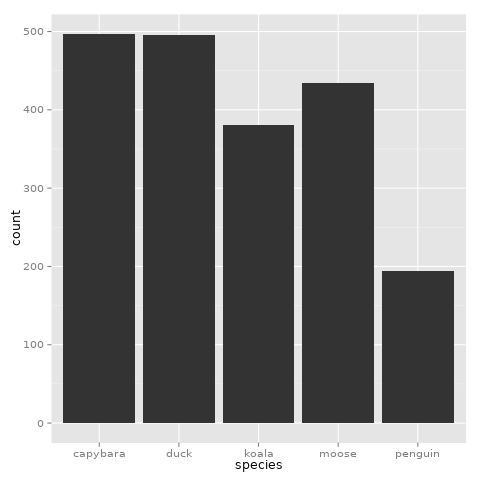

In [15]:
# oops
# nothing to show, because we didn't add a stat or a geom
g + geom_bar()

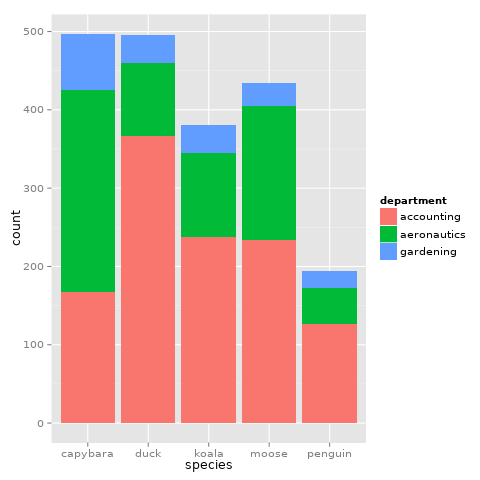

In [20]:
# what if we want to see qsec broken out by department?
g <- ggplot(jobs, aes(species, fill=department))
g + geom_bar()

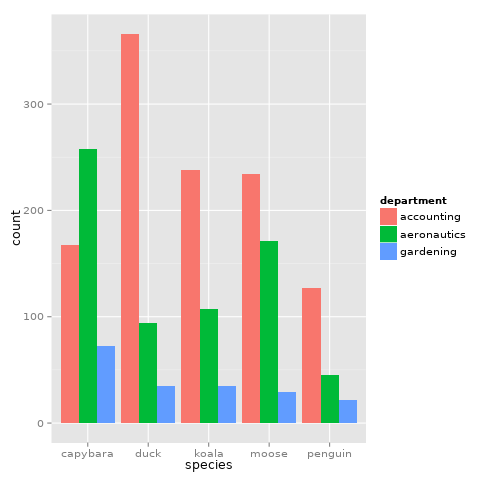

In [21]:
# Instead of stacking factors, we can specify "dodge" positioning

# We can reuse the g variable we defined before

g + geom_bar(position="dodge")

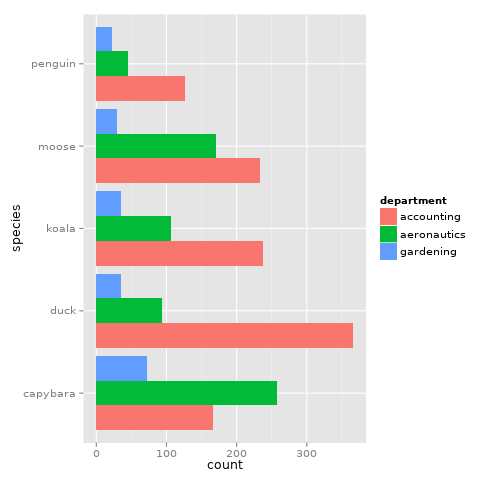

In [22]:
# Coordinate systems are just another mapping

g + geom_bar(position="dodge") + coord_flip()

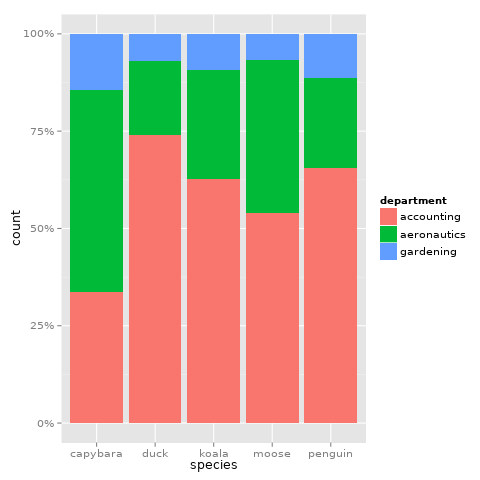

In [24]:
# We might want to see the stacked bars as percents
# Use "fill" positioning

# We can also adjust the y-axis scale to display percents

library(scales)
g + geom_bar(position="fill") + scale_y_continuous(labels=percent_format())

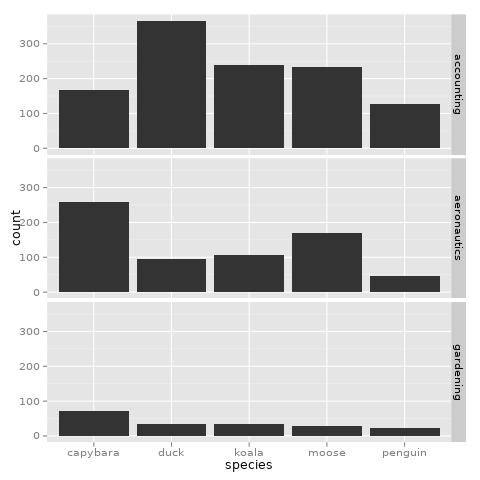

In [37]:
# We can use facets to create multiple plots with the same axes

g <- ggplot(jobs, aes(species))
g + geom_bar() + facet_grid(department ~ .)

# Scatterplots

In [25]:
# use the example iris data set that comes with R

data(iris)
head(iris)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa

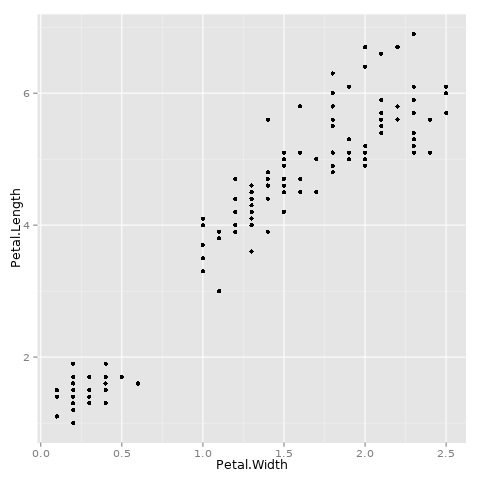

In [26]:
# A basic scatterplot

g <- ggplot(iris, aes(Petal.Width, Petal.Length))
g + geom_point()

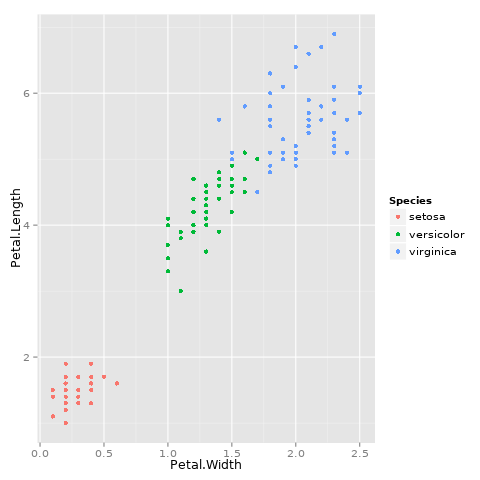

In [27]:
# As before, we can color the geom by Species
# Note that for points, we use the color aesthetic, not the fill aesthetic

g <- ggplot(iris, aes(Petal.Width, Petal.Length, color=Species))
g + geom_point()

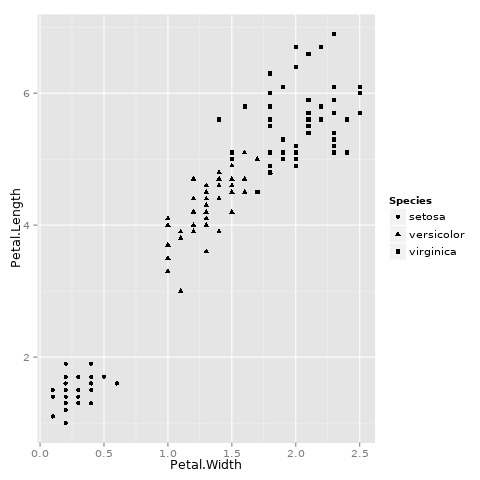

In [28]:
# Alternatively, we can map Species to the shape aesthetic
# This might make more sense for a black-and-white print

g <- ggplot(iris, aes(Petal.Width, Petal.Length, shape=Species))
g + geom_point()

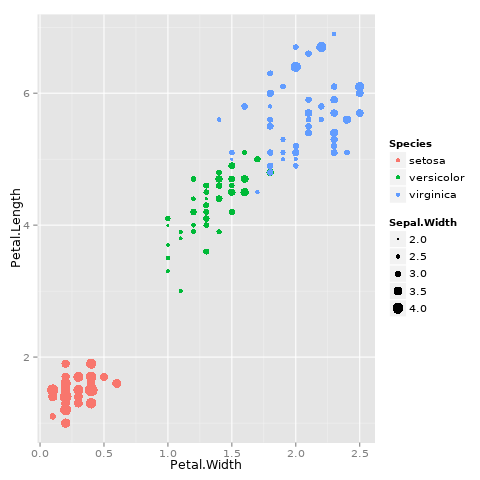

In [29]:
# This isn't very easy to read :(
# We would need to change the default point size

# We can use multiple aesthetics in the same plot

g <- ggplot(iris, aes(Petal.Width, Petal.Length, 
                      color=Species, size=Sepal.Width))
g + geom_point()

In [30]:
# For scatterplots, we often want to measure the relationship
# between the x and y variables

# Perform a linear regression:

lm(Petal.Length ~ Petal.Width, data=iris)


Call:
lm(formula = Petal.Length ~ Petal.Width, data = iris)

Coefficients:
(Intercept)  Petal.Width  
      1.084        2.230  


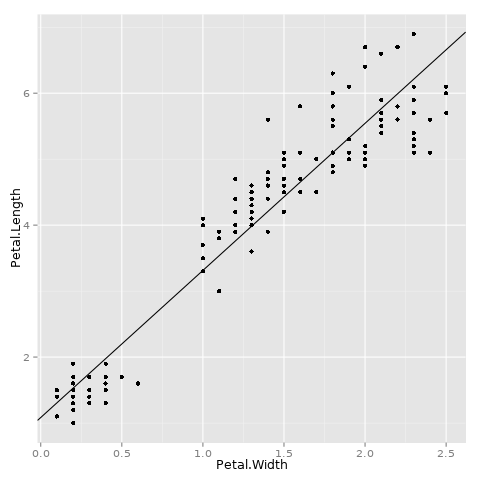

In [32]:
g <- ggplot(iris, aes(Petal.Width, Petal.Length))
g + geom_point() + geom_abline(intercept=1.084, slope=2.230)

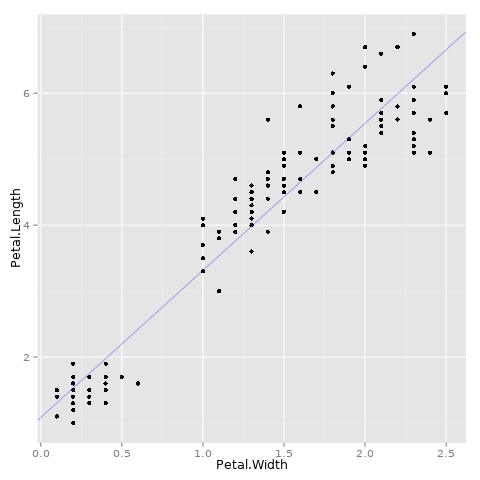

In [34]:
# Personally, I like my regression lines to fade into the background
g <- ggplot(iris, aes(Petal.Width, Petal.Length))
g + geom_point() + 
  geom_abline(intercept=1.084, slope=2.230, color="blue", alpha=0.3)

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


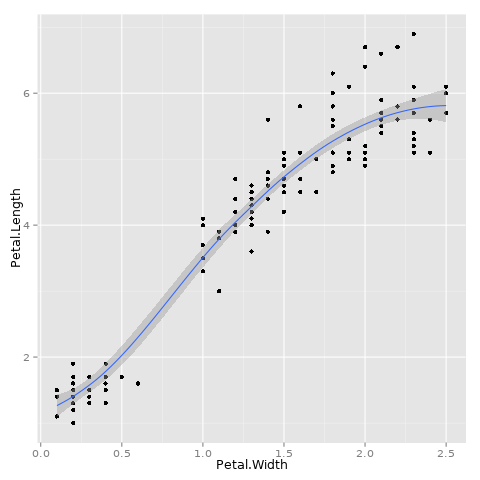

In [35]:
# There is also the "smooth" geom with looks for a trend

g <- ggplot(iris, aes(Petal.Width, Petal.Length))
g + geom_point() + geom_smooth()

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


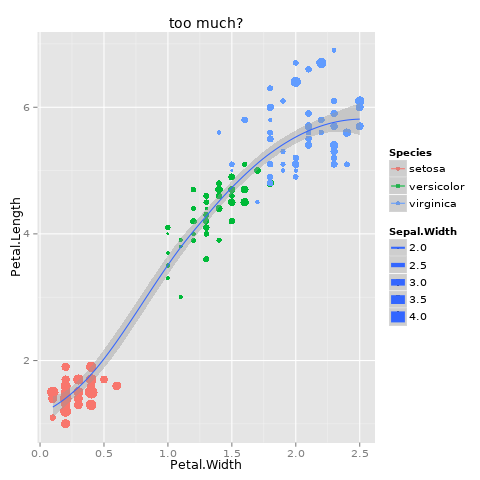

In [36]:
# exercise restraint, it is easy to go overboard

ggplot(iris, aes(Petal.Width, Petal.Length, color=Species, size=Sepal.Width, group=NA)) + 
  geom_point() +
  geom_smooth() +
  labs(title="too much?")

# choropleth plots

In [38]:
# toy data with geo coding

amounts <- read.csv("amounts.csv")
head(amounts)

   fips      amount
1 38089  39361.4608
2 37035  15399.8641
3 18141    466.5579
4 39139   6998.5317
5 17077  46075.6977
6 41051 462510.1057